In [1]:
"""
normalization using cpu takes a long time . 
this function is better be translated to GPU . 
using pytorch , arrays can be replaced by tensors which could then be processed on GPU 


"""



'\nnormalization using cpu takes a long time . \nthis function is better be translated to GPU . \nusing pytorch , arrays can be replaced by tensors which could then be processed on GPU \n\n\n'

In [4]:
import matplotlib.pyplot as plt 
import torch


In [2]:
import numpy as np

def normalization_cpu (self,FFs_vol,Sino_vol ):

        # input : 
        # FFs volume
        # Sinogram Volume
        DarkFieldValue = 100
        backIlluminationValue = 0
        FFmean_vol = np.mean(FFs_vol, axis=0)

        Norm_vol = np.divide(Sino_vol - DarkFieldValue, FFmean_vol - DarkFieldValue - backIlluminationValue)
        
        return Norm_vol

In [5]:
# get an array as image : 

def rand_rectangel(n):
    im =np.random.rand(n,n)*255
    im = im.astype(np.uint8)
    im[(n//2)-n//4:(n//2)+n//4,(n//2)-n//4:(n//2)+n//4]= 0 # a self scaling rectangle 
    
    return im

img = rand_rectangel(500)
img2 = rand_rectangel(500)
#plt.imshow(img)

In [60]:
def numpy_devide (img, img2):
    return np.divide(img,img2)

def torch_devie(img , img2):
    cuda1 = torch.device('cuda')
	
    t_img = torch.from_numpy(img).cuda(cuda1)
    t_img2 = torch.from_numpy(img2).cuda(cuda1)
    return torch.divide(t_img,t_img2)
    


In [12]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [32]:
t_img = torch.from_numpy(img) # trying out division and subtracting 
t_img/t_img 

tensor([[1., 1., 1.,  ..., 1., 1., 1.],
        [1., 1., 1.,  ..., 1., 1., 1.],
        [1., 1., 1.,  ..., 1., 1., 1.],
        ...,
        [1., 1., 1.,  ..., 1., 1., 1.],
        [1., 1., 1.,  ..., 1., 1., 1.],
        [1., 1., 1.,  ..., 1., 1., 1.]])

In [34]:
np_arr = t_img.cpu().detach().numpy() # converting back to numpy array
np_arr

array([[ 66, 135, 228, ..., 187,  93,   3],
       [ 90,  22,  32, ...,  64,  41,  21],
       [ 32,  60,  38, ..., 139, 209,  26],
       ...,
       [116, 198,  77, ...,  96, 180, 161],
       [223, 179,  48, ..., 234, 110, 125],
       [ 18,  59,  16, ..., 116,  88, 238]], dtype=uint8)

In [14]:
%timeit numpy_devide(img,img2)


C:\Users\sdayani\AppData\Local\Temp\5/ipykernel_21448/2677505668.py:2: RuntimeWarning: divide by zero encountered in true_divide
  return np.divide(img,img2)
C:\Users\sdayani\AppData\Local\Temp\5/ipykernel_21448/2677505668.py:2: RuntimeWarning: invalid value encountered in true_divide
  return np.divide(img,img2)


2.72 ms ± 194 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [16]:

%timeit torch_devie(img,img2)

186 µs ± 41.2 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [19]:
device

device(type='cuda')

C:\Users\sdayani\AppData\Local\Temp\5/ipykernel_21448/3882225483.py:2: RuntimeWarning: invalid value encountered in true_divide
  return np.divide(img,img2)


2.62 ms ± 230 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
459 µs ± 16.7 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
2.65 ms ± 126 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
445 µs ± 13.1 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


Text(0, 0.5, 'Average Execution Time (seconds)')

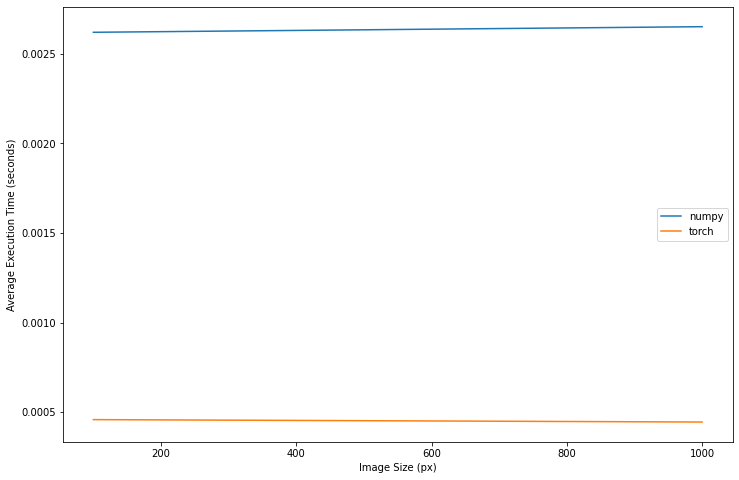

In [61]:
images = []
for n in  [100,1000]:
    im = rand_rectangel(n)
    images.append(im)
    
    
r_numpy=[]
r_torch= []

for image in images:
    r_ = %timeit -o numpy_devide(img,img)  # this saves the result of timeit into the variable r_
    r_numpy.append(r_.average)

    r_ = %timeit -o torch_devie(img,img)
    r_torch.append(r_.average)


def plot_result ( ax, result , legend):
    x = [100,1000]
    ax.plot(x,result, label = legend )


fig,ax = plt.subplots(1,1, figsize = (12,8))

plot_result(ax, r_numpy , 'numpy')
plot_result(ax, r_torch , 'torch')
#plot_result(ax, r_scipy , 'Scipy')
ax.legend()
ax.set_xlabel('Image Size (px)')
ax.set_ylabel('Average Execution Time (seconds)')

In [37]:
#convert uint16 to int32 for pytorch 
#can't convert np.ndarray of type numpy.uint16. The only supported types are: float64, float32, float16, complex64, complex128, int64, int32, int16, int8, uint8, and bool.

np_uint16 = np.array([0,5,65000,5,20,1],dtype=np.uint16)
torch.from_numpy(np_uint16)

TypeError: can't convert np.ndarray of type numpy.uint16. The only supported types are: float64, float32, float16, complex64, complex128, int64, int32, int16, int8, uint8, and bool.

In [54]:

np_uint16 = np.array([0,5,65000,5,20,1],dtype=np.uint16)
torch_float32 = torch.from_numpy(np_uint16.astype(np.float16))

In [55]:
torch_float32

tensor([0.0000e+00, 5.0000e+00, 6.4992e+04, 5.0000e+00, 2.0000e+01, 1.0000e+00],
       dtype=torch.float16)

In [56]:
np_uint16.mean()

10838.5

In [57]:
torch_float32.mean().cpu().detach().numpy().astype(np.uint16)

array(10840, dtype=uint16)

In [42]:
arr = torch_int32.cpu().detach().numpy()

In [46]:
torch_int32.mean()

RuntimeError: mean(): could not infer output dtype. Input dtype must be either a floating point or complex dtype. Got: Int

In [45]:
t = torch.cuda.get_device_properties(0).total_memory
r = torch.cuda.memory_reserved(0)
a = torch.cuda.memory_allocated(0)
f = r-a  # free inside reserved
print('GPU Memory usage:')
print('\tTotal memory: '+str(t/2**20)+' MB')
print('\tMemory reserved by PyTorch: '+str(r/2**20)+' MB')
print('\tMemory allocated by PyTorch: '+str(a/2**20)+' MB')
print('\tFree allocated memory : '+str(f/2**20)+' MB')
print('\tTotal free memory: '+str((t-a)/2**20)+' MB')


GPU Memory usage:
	Total memory: 8191.5625 MB
	Memory reserved by PyTorch: 0.0 MB
	Memory allocated by PyTorch: 0.0 MB
	Free allocated memory : 0.0 MB
	Total free memory: 8191.5625 MB


In [63]:
import pandas as pd 

d = [[1,2,3], [2]]
pd.DataFrame(d)

,0,1,2
0,1,2.0,3.0
1,2,NaN,NaN
